# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, I built multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.  *Note: I originally completed this small project through DataCamp. The site supplies, the topic, the data, a few questions, and checks the results are correct.  I supplied the analysis, results, and conclusions.  You can see more projects and courses I've completed at:* [https://www.datacamp.com/portfolio/mountaintr](https://www.datacamp.com/portfolio/mountaintr)

In [78]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

**Project Instructions**

Identify the single feature that has the strongest predictive performance for classifying crop types.

Find the feature in the dataset that produces the best score for predicting "crop".
From this information, create a variable called best_predictive_feature, which:

-Should be a dictionary containing the best predictive feature name as a key and the evaluation score (for the metric you chose) as the value.

In [79]:
# check for missing values; looks like there are 2200 rows and no null entries in any column.
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [80]:
# Taking a look at the variables and the distribution of values
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [81]:
# Let's take a look at the crops (categories) that we're trying to predict.  Looks like there are 22, each with an equal number of rows (100), so it's a balanced multi-class classification set.
crops['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

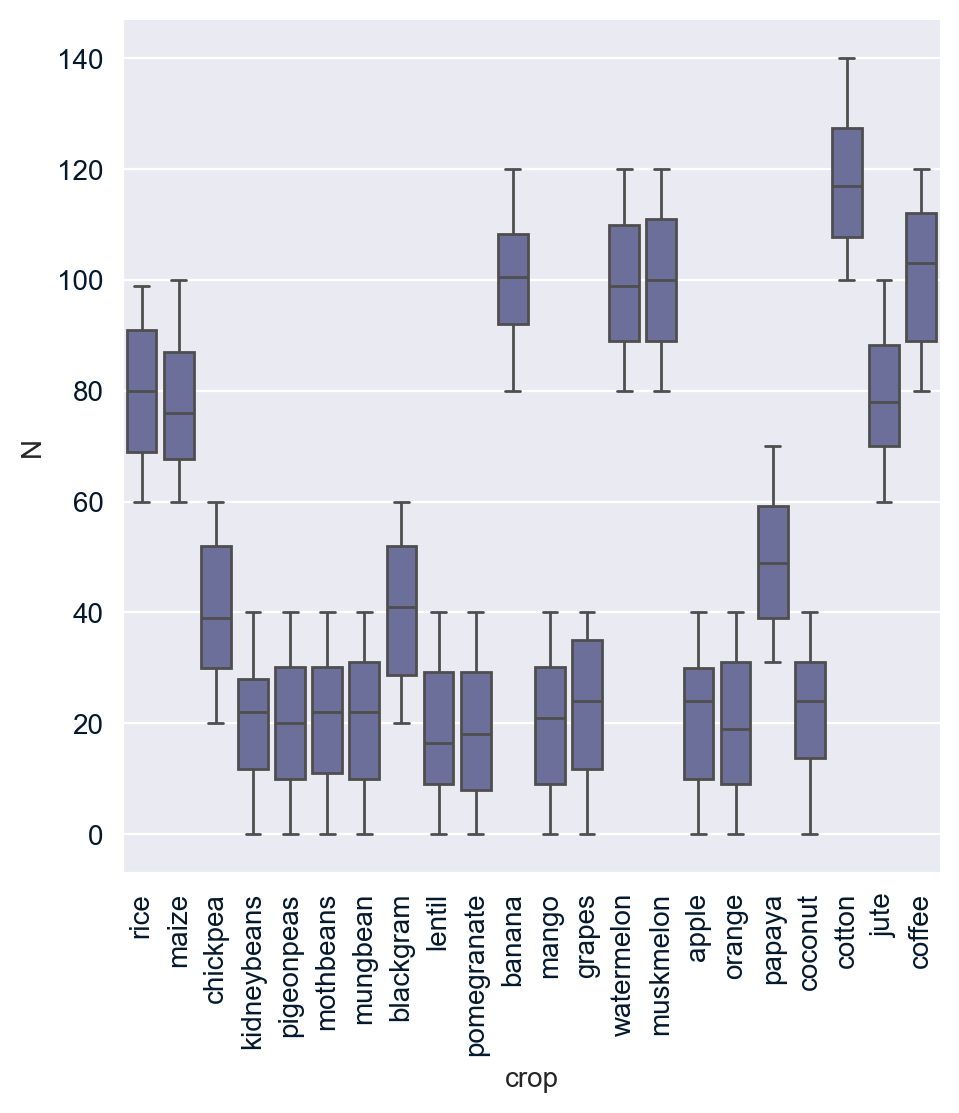

In [82]:
# Looks like there are a few crops that have soil with high amount of Nitrogen: rice, maize, banana, melons, cottom, juite, and coffee
sns.set_style("darkgrid")
sns.catplot(x="crop", y="N", data=crops, kind="box")
plt.xticks(rotation=90)
plt.show()

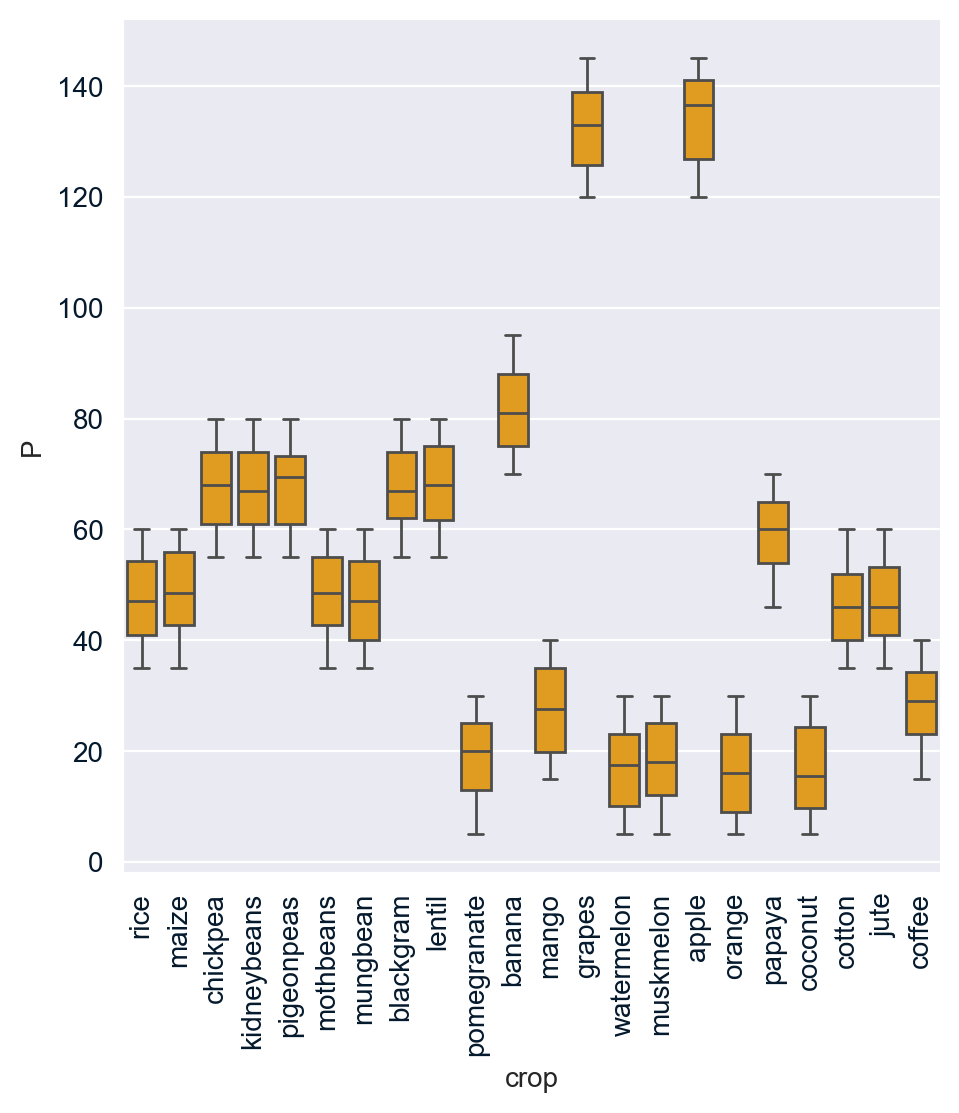

In [83]:
# Looks like there are a few crops that have soil with a very high amount of Phosporus: grapes and apples
sns.set_style("darkgrid") 
sns.catplot(x="crop", y="P", data=crops, kind="box", color="orange") 
plt.xticks(rotation=90) 
plt.show()

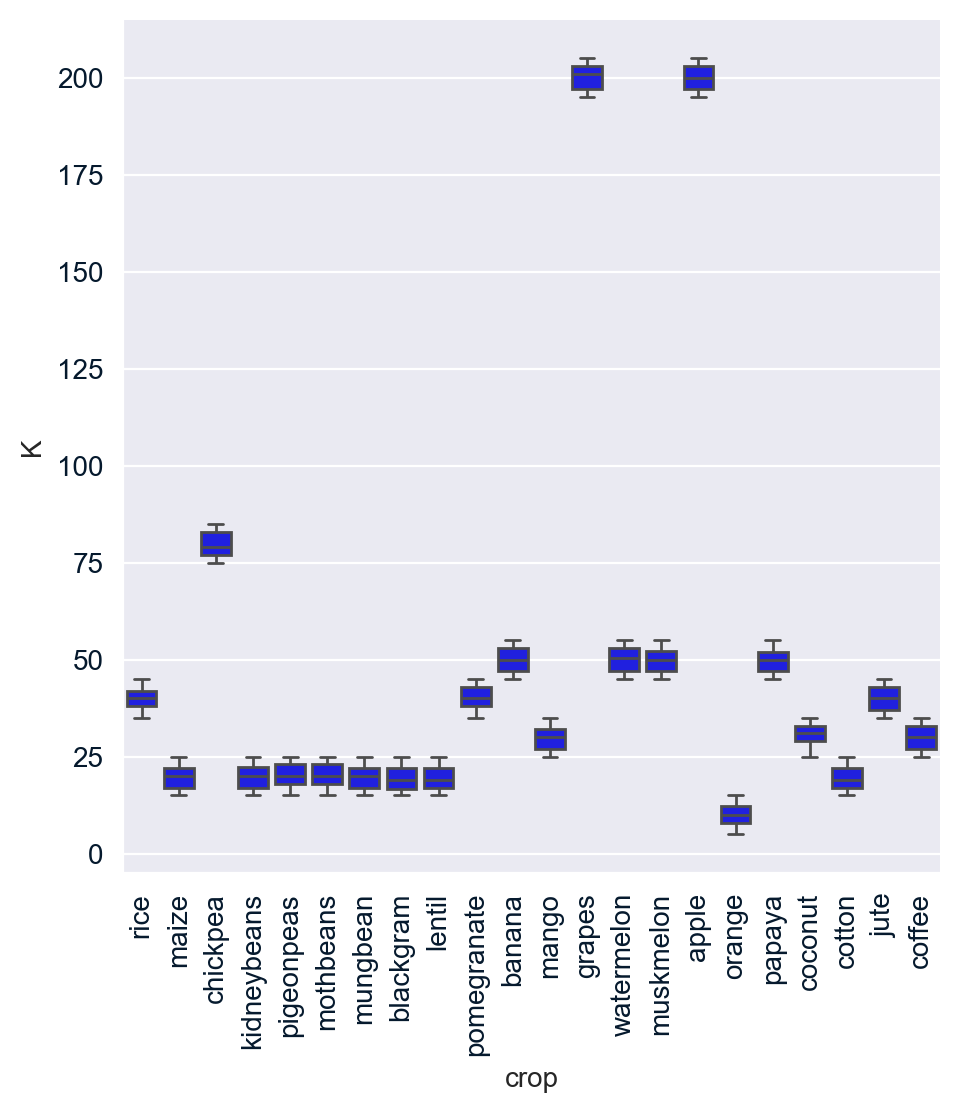

In [84]:
# Looks like there are a few crops that have soil with a very high amount of Potassium: again it's grapes and apples.
sns.set_style("darkgrid") 
sns.catplot(x="crop", y="K", data=crops, kind="box", color="blue") 
plt.xticks(rotation=90) 
plt.show()

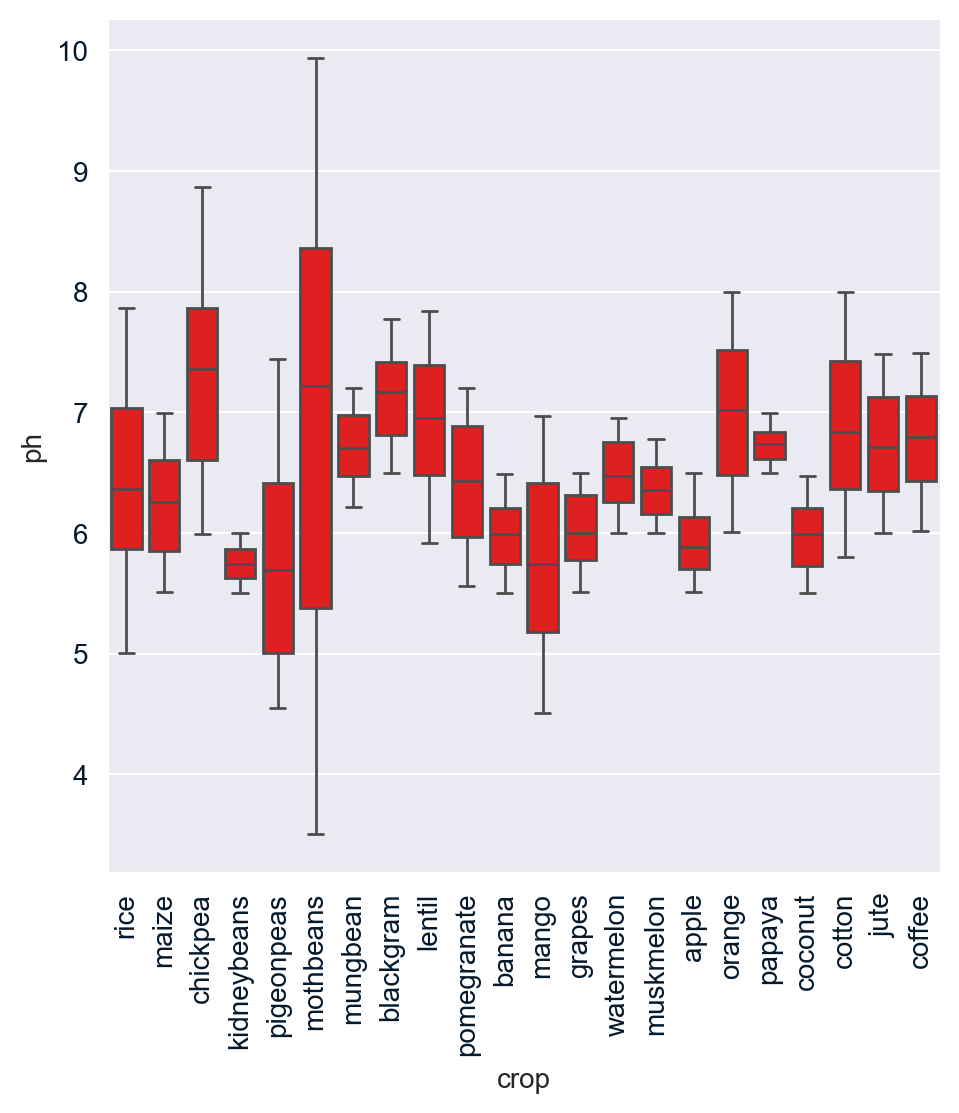

In [85]:
# Most crops like a slightly acidic soil (6-7pH) while a few can grow in a wide variety of pH levels (mothbeans, rice, and chickpeas)
sns.set_style("darkgrid") 
sns.catplot(x="crop", y="ph", data=crops, kind="box", color='r') 
plt.xticks(rotation=90) 
plt.show()

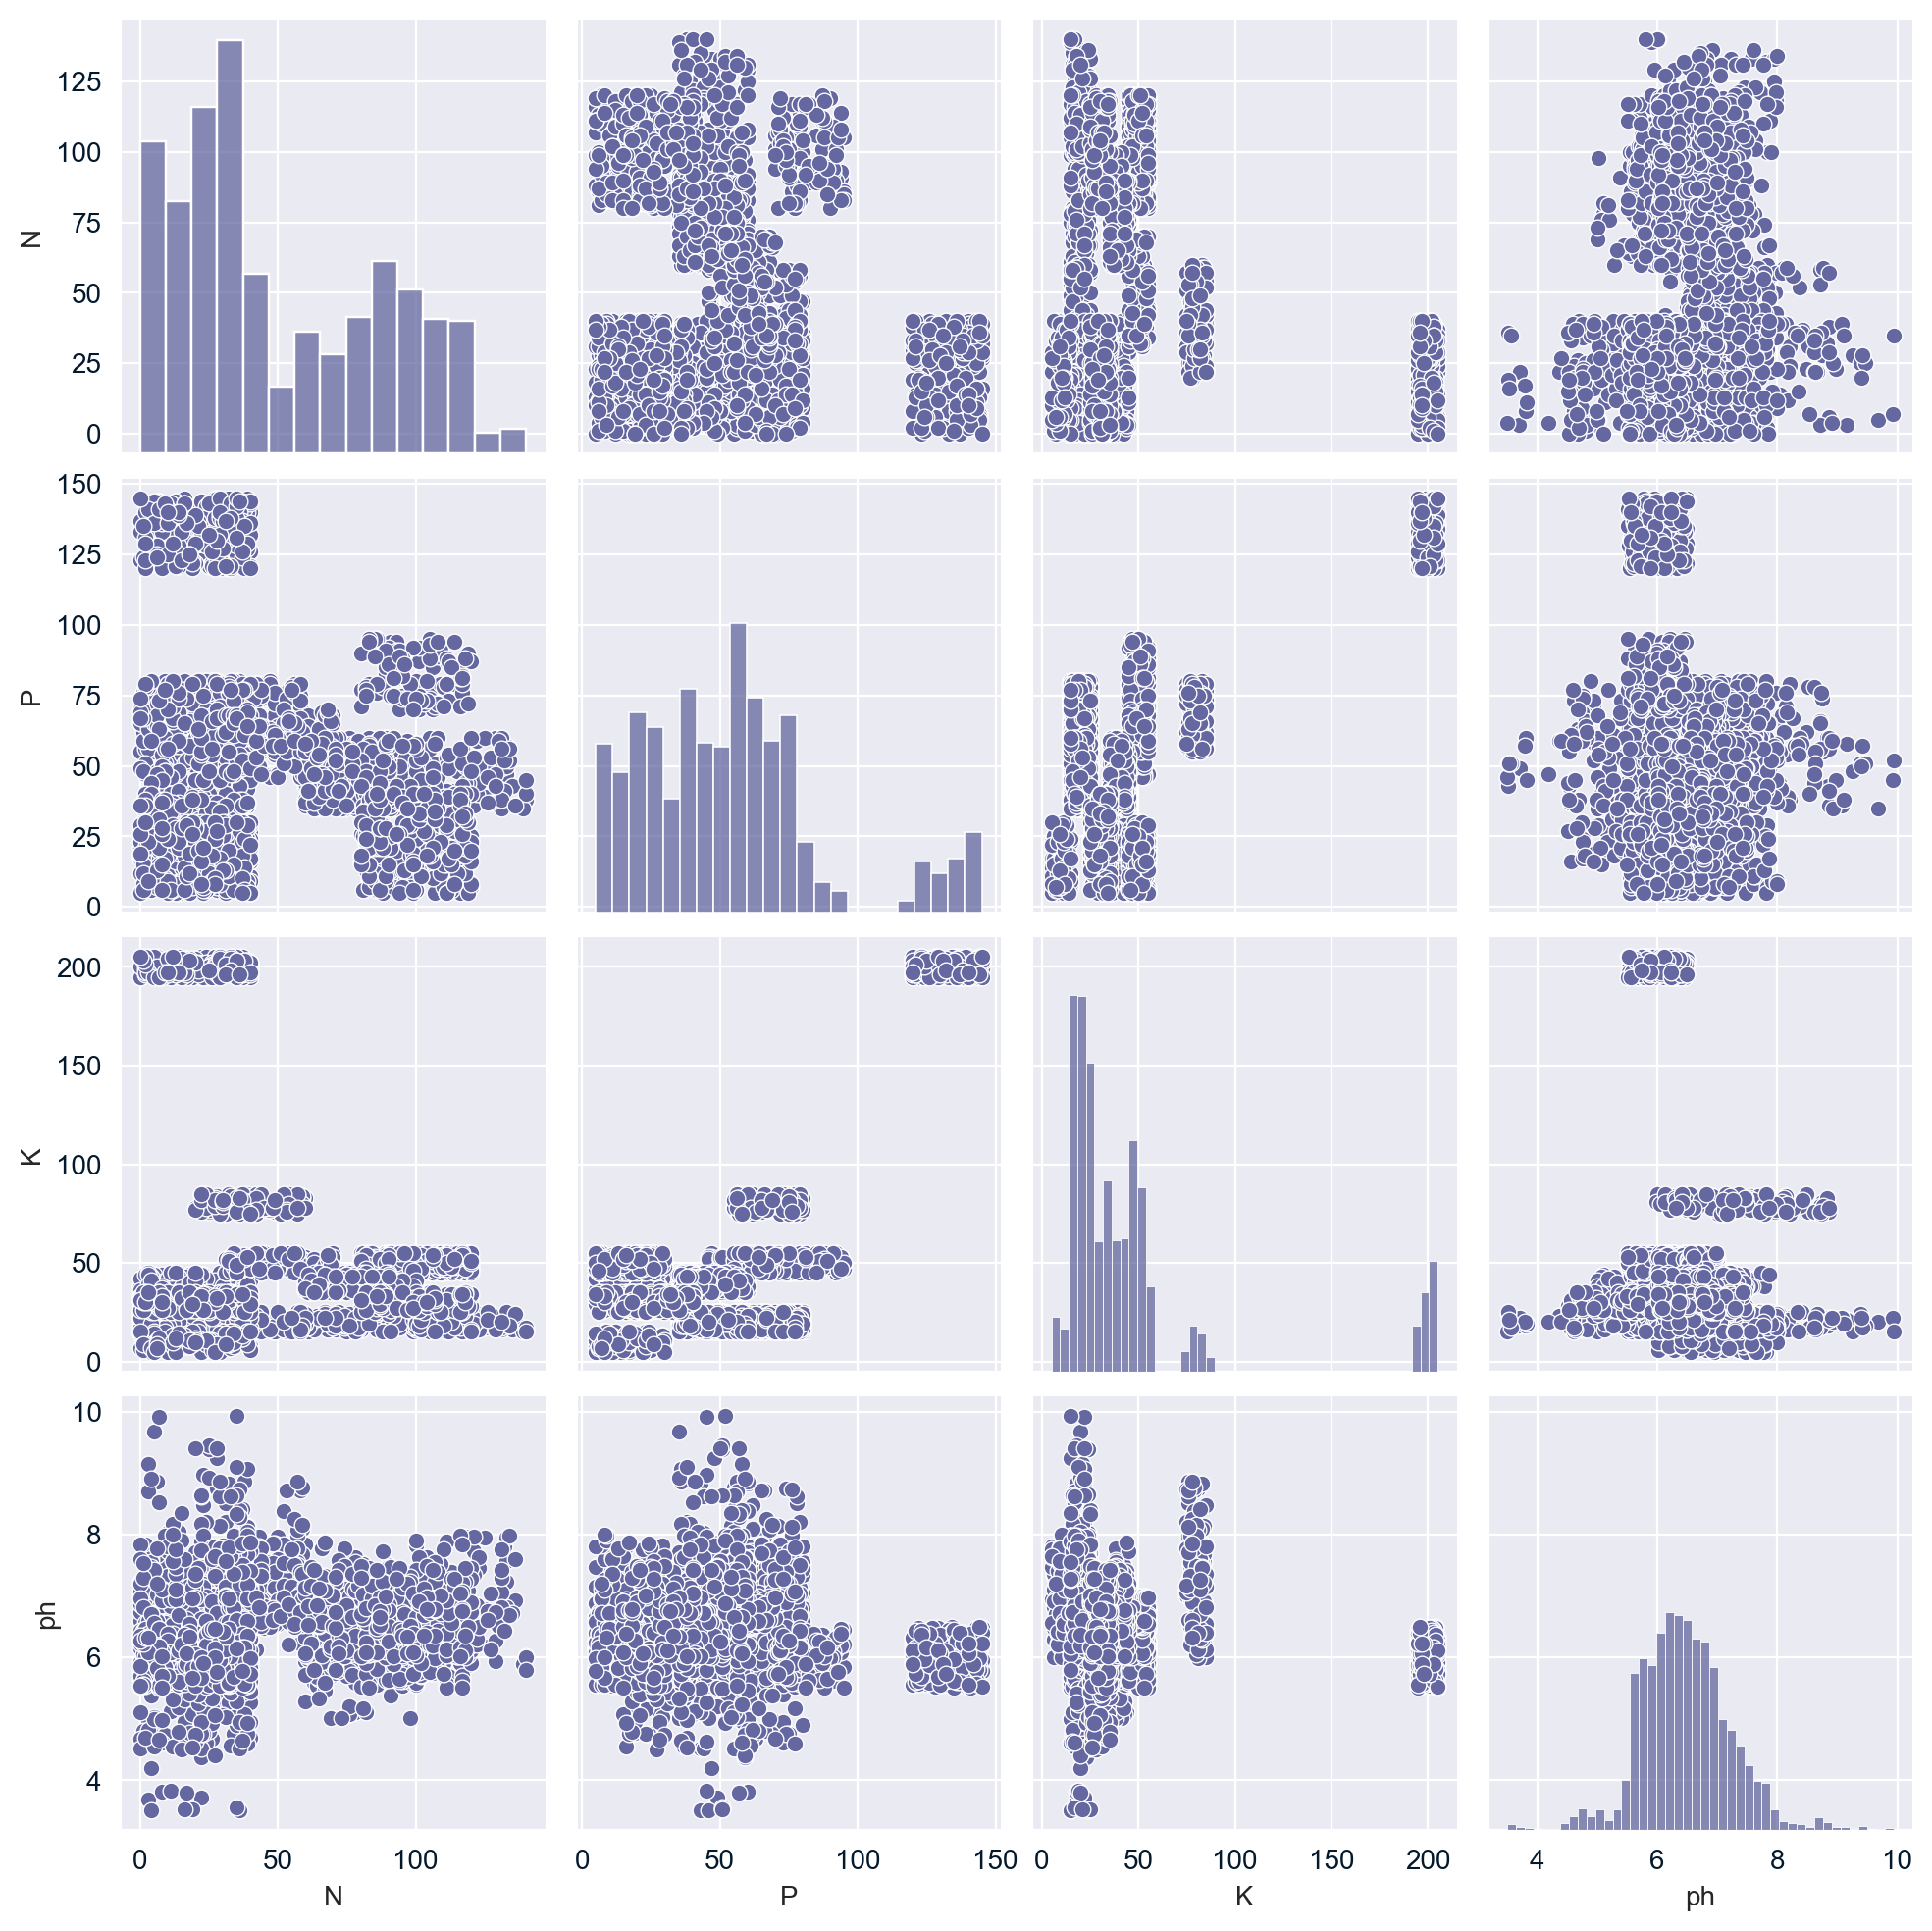

In [86]:
# A pairwise plot of N, P, K, and pH reveals some interesting patterns.  Almost all separate into distinct sections.  These data look too neatly bounded.  I'm guessing they're actually psuedo data that was just made by DataCamp for this project.
sns.pairplot(crops)

<AxesSubplot: >

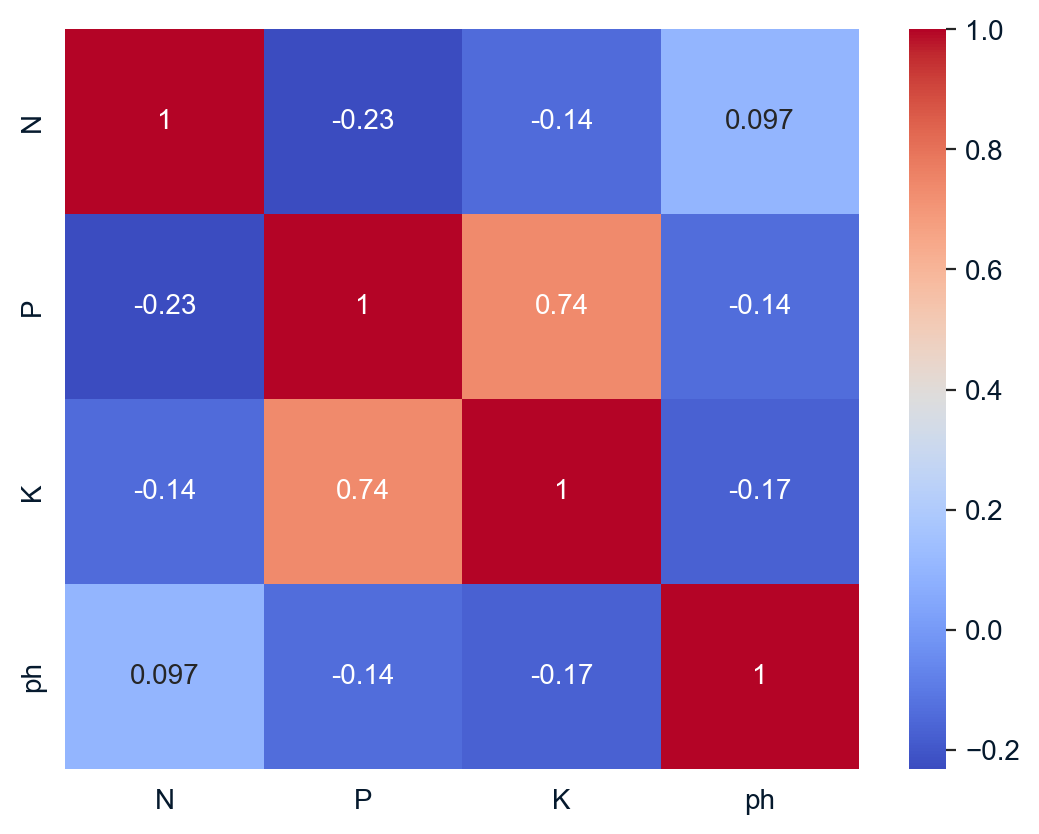

In [87]:
# Using a correlation heatmap, it looks like only Phosphorus and Potassium are correlated (positiive corr of 0.74).
sns.heatmap(crops.corr(), annot=True, cmap="coolwarm")

In [88]:
# Split data
X = crops[['N', 'P', 'K', 'ph']]
y = crops['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Predict the crop using each feature individually
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

feature_perf_dict = {}
for feature in ["N", "P", "K", "ph"]:
    logreg = LogisticRegression(multi_class="multinomial")
    logreg.fit(X_train[[feature]], y_train)
    y_pred = logreg.predict(X_test[[feature]])
    feature_performance = metrics.f1_score(y_test, y_pred, average="weighted")
    feature_perf_dict[feature] = feature_performance
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: 0.09149868209906838
F1-score for P: 0.14761942909728204
F1-score for K: 0.23896974566001802
F1-score for ph: 0.04532731061152114


In [76]:
# Potassium (K) had the highest F1-score
best_predictive_feature = {"K": feature_perf_dict["K"]}
print(best_predictive_feature)

{'K': 0.23896974566001802}


In [96]:
# For comparison, here is the F1 score if one were to use all 4 factors to predict the type of crop to grow.  0.54 is about double what the single-best variable (Potassium) could predict alone.
logreg = LogisticRegression(multi_class="multinomial")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.f1_score(y_test, y_pred, average="weighted"))

0.5454206655375167


## Conclusion
### If a farmer is considering testing the soil to find which crops can best be grown there but only has enough money to test one factor, in this example, the best factor would be Potassium (K) as it had a higher F1 score.  The F1 score balances errors of omission (false negatives) and errors of commission (false positives).  However, a score of 0.239 in a range of 0 to 1, may not be high enough predictive power to warrant the testing cost.  It may be better to wait until funds are available to measure multiple factors or use local expertise to make the decision if this is not possible.